In [2]:
import atoti as tt

Welcome to atoti 0.6.5!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, set the ATOTI_DISABLE_TELEMETRY environment variable to True.

You can hide this message by setting the ATOTI_HIDE_EULA_MESSAGE environment variable to True.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

# Reading data for red and white wine

In [4]:
wine_red = pd.read_csv(
    "https://data.atoti.io/notebooks/wine-analytics/winequality-red.csv",
    sep=";")


In [5]:
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine_white = pd.read_csv(
    "https://data.atoti.io/notebooks/wine-analytics/winequality-white.csv",
    sep=";")

wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Merging dataset for loading into atoti

In [7]:
wine_red["category"]= "Red"
wine_white["category"]= "White"

wines = pd.concat([wine_red, wine_white], ignore_index = True)
wines.index.set_names("wine index", inplace=True)
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
wine index,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [8]:
wines["alcohol range"] = wines["alcohol"].apply(np.floor)

In [9]:
wines["Rating"]= "Good"
wines.loc[wines["quality"]< 7, "Rating"] = "Average"
wines.loc[wines["quality"]< 5, "Rating"] = "Poor"
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,alcohol range,Rating
wine index,,,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red,9.0,Average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red,9.0,Average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red,9.0,Average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red,9.0,Average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red,9.0,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White,11.0,Average
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White,9.0,Average
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White,9.0,Average


# Getting started with atoti

In [11]:
session = tt.Session(user_content_storage="./content_full")

In [12]:
wines_table = session.read_pandas(
    wines,
    keys=["wine index"],
    table_name= "Wines Quality",
    hierarchized_columns = [
        "wine index",
        "category",
        "quality",
        "alcohol range",
        "Rating",
        "sulphates",])

wines_table.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,alcohol range,Rating
wine index,,,,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,9.0,Average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red,9.0,Average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red,9.0,Average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red,9.0,Average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red,9.0,Average


In [13]:
cube = session.create_cube(wines_table, "Wines Analytics 1")

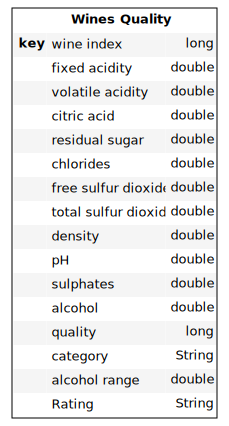

In [14]:
cube.schema

# Quick analytics

In [15]:
session.visualize("Types of wine")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Exception ignored in atexit callback: <function _send_exit_event at 0x000002556FDB7C70>
Traceback (most recent call last):
  File "C:\Users\BASSAM\anaconda3\envs\atoti\lib\site-packages\atoti\_telemetry.py", line 162, in _send_exit_event
    _send_event_to_telemetry_service(ExitEvent(duration=datetime.now() - imported_at))
  File "C:\Users\BASSAM\anaconda3\envs\atoti\lib\site-packages\atoti\_telemetry.py", line 105, in _send_event_to_telemetry_service
    _ASYNC_EXECUTOR.submit(
  File "C:\Users\BASSAM\anaconda3\envs\atoti\lib\concurrent\futures\thread.py", line 167, in submit
    raise RuntimeError('cannot schedule new futures after shutdown')
RuntimeError: cannot schedule new futures after shutdown
